# Progetto gruppo H (De Boni, Keller, Spozio)



## Decessi correlati alle Droghe  in Connecticut (2012-2017)
### Dataset

Il nostro progetto consiste nell'analizzare il dataset riguardante *Accidental Drug Related Deaths 2012-2017*. 
Il quale mostra tutte le morti per droghe in Connecticut tra il 2012 ed il 2017. 


In questo Dataset abbiamo vari attributi interessanti:

- *Data*: Data di ritrovamento del cadavere (in formato giorno/mese/anno)
- *Sex*: Sesso della persona
- *Race*: Etnia della persona
- *Age*: Età della vittima
- *Residence*: Residenza di abitazione (City, State, Country)
- *Death*: Luogo di morte (City, State, Country)
- *Location*: Locazione della morte (Casa, Ospedale, Altro)
- *Description*: Descrizione della morte
- *InjuryPlace*: Dove hanno assunto la sostanza
- *ImmediateCauseA*: La causa della morte
- *Drug*: Vari cambi che specificano la droga assunta tramite Y
- *MannerofDeath*: Tipo di morte (es. Accidentale)
- *AmendedMannerofDeath*: Modifica del modo di morire
- *DeathLoc*: Locazione dove è morto



### Popolazione

Il grafico seguente mostra come è evoluta la popolazione in Connecticut dal 2012. Si può notare che è restata costante negli ultimi anni attenstandosi ai 3,6 milioni di persone. Questo ci aiuterà anche per i grafici successivi



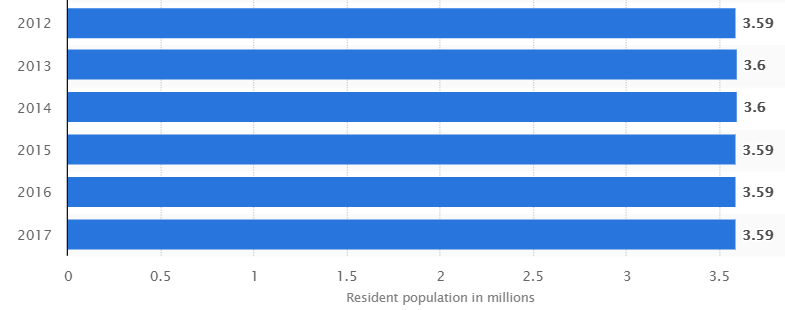
Fonte: https://www.statista.com/statistics/206104/resident-population-in-connecticut/

In [1]:
import pandas as pd
import numpy as np
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

df = pd.read_csv("Accidental_Drug_Related_Deaths__2012-2017.csv")

numeroMaschi = 1754549
numeroFemmine = 1842128
totale = 3596677
m = numeroMaschi/totale
f = numeroFemmine/totale
labels =['Maschi', 'Femmine']
values = [m,f]
colors = ['#1500ff', '#d92488']

dfNew = df.dropna(subset=['Sex'])
maskF = dfNew['Sex'] == "Male"



fig = {
  "data": [
    {
      "values": values,
      "labels": labels,
      "domain": {"x": [0, .48]},
      "name": "Popolazione Connecticut (2018)",
      "hoverinfo":"label+percent",
      "textinfo": "label+percent",
      "type": "pie",
      'marker':{'colors': colors},
    },
    {
      "values": [np.sum(dfNew == "Male")['Sex'],np.sum(dfNew == "Female")['Sex']],
      "labels": labels,
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Morti per Sesso",
      "hoverinfo":"label+percent",
      "textinfo": "label+percent",
      "type": "pie",
      'marker':{'colors': colors},
    }],
  "layout": {
          "annotations": [
                {
                    "font": {
                        "size": 20
                    },
                    "showarrow": False,
                    "text": "Popolazione(2018)",
                    "x": 0.13,
                    "y": 1.20
                },
                {
                    "font": {
                        "size": 20
                    },
                    "showarrow": False,
                    "text": "Morti per droga",
                    "x": 0.85,
                    "y": 1.20
                }
            ]
       
    }
}
py.iplot(fig, filename='donut')





### Popolazione (2018) vs Decessi per Droga (2012-2017) 

Questo primo grafico è a titolo informativo, vogliamo osservare la distribuzione degli uomini e delle donne in Connecticut nel 2018 per avere un'idea della ripartizione dei due sessi. Possiamo comunque constatare che questi sono quasi equamente distribuiti con un leggero 1,21% di popolazione in più che appartiene al sesso femminile.

In questo istogramma si può notare che nel nostro dataset c'è un numero maggiore di morti di sesso maschile rispetto a quelli di sesso femminile. Ci fa dunque constatare che gli uomini tendono a drogarsi in modo eccessimo rispetto alle donne, proprio come ci aspettevamo.

In [2]:
new = df.dropna(subset=['Age'])

age = new['Age']

trace0 = go.Box(
    y=age,
    name=""
)

layout = go.Layout(
    title='Età di assunzione ',
    yaxis=dict(
        title='Età',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data = [trace0]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

### Facia d'età più incline


Il boxplot illustrato sopra mostra i quartili e l'outlier dell'età, al momento del decesso, di assunzione delle droghe. Contrariamente a quanto ci aspettavamo, la mediana si situa a 42 anni, e ciò è più elevata rispetto alle aspettative. Oltre a ciò, solo il 25% delle persone che assumono droghe muoiono sotto i 31 anni, questo risultato è altresì contrario a ciò che avevamo predetto. 

Una spiegazione possibile è che i giovani in Connecticut non hanno i mezzi necessari per potersi permettere l'acquisto di sostanze stupefacenti e quindi l'età media si situa nel momento in cui le persone hanno abbastanza disponibilità economica.

Un dato molto sorprendente è la presenza di una bambina di 14 anni morta di Overdose per Eroina e Fentanyl.

In [14]:
dfNew = df.dropna(subset=['Age'])
maskM = df.dropna(subset=['Age'])['Sex'] == "Male"
maskF = df.dropna(subset=['Age'])['Sex'] == "Female"

trace0 = go.Histogram(
    x=dfNew['Age'][maskM],
    name = 'Maschi',
    orientation = 'v',
    xbins=dict(
        size=5
    ),
   
)
trace1 = go.Histogram(
    x=dfNew['Age'][maskF],
    name = 'Femmine',
    orientation = 'v',
    xbins=dict(
        size=5
    ),
)

data = [trace0, trace1]
layout = go.Layout(
    title='Morti in base all`età e sesso',
    xaxis=dict(
        title='Età',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Numero di Morti',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

### In Base al Sesso ed Età

?? Commenti

In [15]:
dfNew = df.dropna(subset=['Age'])
maskM = df.dropna(subset=['Age'])['Sex'] == "Male"
maskF = df.dropna(subset=['Age'])['Sex'] == "Female"

dfMaschi = dfNew['Age'][maskM]
dfFemmine = dfNew['Age'][maskF]

value = []
valueM = []
valueF = []
for i in range(1,20):
    value.append(0)
    valueM.append(0)
    valueF.append(0)


for i in range(len(dfNew)):
    index = dfNew['Age'].values[i]
    index = index/5;
    value[int(index)] +=1
for i in range(len(dfMaschi)):
    index = dfMaschi.values[i]
    index = index/5;
    valueM[int(index)] +=1
for i in range(len(dfFemmine)):
    index = dfFemmine.values[i]
    index = index/5;
    valueF[int(index)] +=1

T = np.array(value)
M =np.array(valueM)
F = np.array(valueF)
R = np.array(range(20))


VM = (M/T)*100
VF = (F/T)*100
VM[np.isnan(VM)] = 0
VF[np.isnan(VF)] = 0

trace0 = go.Bar(
    y=VM,
    x=R*5,
    name = 'Maschi',
    orientation='v',
)
trace1 = go.Bar(
    y=VF,
    x=R*5,
    name = 'Femmine',
    orientation='v',
    
)

data = [trace0, trace1]
layout = go.Layout(
    title='Percentuale di Morte per Età',
    xaxis=dict(
        title='Età',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Percentuale (%)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    barmode='stack',
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

C:\Users\jonat\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\jonat\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning:

invalid value encountered in true_divide



### In Base al Sesso ed Età

?? Commenti

In [3]:
dfHeroine = (df.dropna(subset=['Heroin']) == "Y")
dfCocaine = df.dropna(subset=['Cocaine'])== "Y"
dfFentanyl = df.dropna(subset=['Fentanyl'])== "Y"
dfOxyco = df.dropna(subset=['Oxycodone'])== "Y"
dfEtOH = df.dropna(subset=['EtOH'])== "Y"
dfHydrocodone = df.dropna(subset=['Hydrocodone'])== "Y" 
dfBenzodiazepine = df.dropna(subset=['Benzodiazepine'])== "Y"
dfMethadone = df.dropna(subset=['Methadone'])== "Y"
dfAmphet = df.dropna(subset=['Amphet'])== "Y"
dfTramad = df.dropna(subset=['Tramad'])== "Y"
dfMorphine = df.dropna(subset=['Morphine (not heroin)'])== "Y"
dfOther = df.dropna(subset=['Any Opioid'])== "Y"

maskF = dfNew['Sex'] == "Male"
 


names = np.array(['Eroina', 'Cocaina','Fentanyl','Ossicodone','EtOH','Hydrocodone','Benzodiazepine','Metadone','Anfetamine','Tramad','Morfina', 'Altro'])
nums_of_deaths = [np.sum(dfHeroine)['Heroin'],np.sum(dfCocaine)['Cocaine'],np.sum(dfFentanyl)['Fentanyl'],
       np.sum(dfOxyco)['Oxycodone'],np.sum(dfEtOH)['EtOH'],np.sum(dfHydrocodone)['Hydrocodone'],
       np.sum(dfBenzodiazepine)['Benzodiazepine'],np.sum(dfMethadone)['Methadone'],np.sum(dfAmphet )['Amphet'],
       np.sum(dfTramad)['Tramad'],np.sum(dfMorphine )['Morphine (not heroin)'],np.sum(dfOther)['Any Opioid']]
index = np.argsort(nums_of_deaths)
crescent = names[index]
decrescent = crescent[::-1]

trace1 = go.Bar(
    y=crescent,
    x=[np.sum(dfMorphine )['Morphine (not heroin)'],np.sum(dfTramad)['Tramad'],np.sum(dfHydrocodone)['Hydrocodone'],
       np.sum(dfAmphet )['Amphet'],np.sum(dfMethadone)['Methadone'],np.sum(dfOxyco)['Oxycodone'],np.sum(dfOther)['Any Opioid'],
       np.sum(dfEtOH)['EtOH'],np.sum(dfBenzodiazepine)['Benzodiazepine'],np.sum(dfCocaine)['Cocaine'],
       np.sum(dfFentanyl)['Fentanyl'],np.sum(dfHeroine)['Heroin']],
    orientation = 'h',
)

data = [trace1]

layout = go.Layout(
    margin=go.layout.Margin(
        l=130,
    ),
    title='Morti in Connecticut per droga (2012 - 2017)',
    yaxis=dict(
        title='Droga Utilizzata',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        ),
    ),
    xaxis=dict(
        title='Numero di Morti',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='horizontal histogram')

### Le Droghe

Heroin $200 per gram ca. https://addictionresource.com/drugs/heroin/heroin-street-value/

Cocaine $300 per gram ca. http://www.narcoticnews.com/drug-prices/cocaine/

Fentanyl $60 per gram ca. https://www.affirmhealth.com/blog/word-on-the-street-fentanyl


Il grafico mostra quali sono le droghe che causano maggiori decessi nel nostro dataset. Si può appurare che tra le posizioni più basse vi sono principalmente droghe considerate come medicamenti, questo ci fa intuire che sono quelle meno diffuse e difficili da comperare senza una ricetta medica. Troviamo infatti tra le droghe più mortali, quelle che sono più conosciute a livello internazionale e di cui si sente più parlare. Tra queste trovaimo l'eroina e la cocaina

In [4]:
dfHeroine = (df.dropna(subset=['Heroin']) == "Y")
dfCocaine = df.dropna(subset=['Cocaine'])== "Y"
dfFentanyl = df.dropna(subset=['Fentanyl'])== "Y"
dfOxyco = df.dropna(subset=['Oxycodone'])== "Y"
dfEtOH = df.dropna(subset=['EtOH'])== "Y"
dfHydrocodone = df.dropna(subset=['Hydrocodone'])== "Y" 
dfBenzodiazepine = df.dropna(subset=['Benzodiazepine'])== "Y"
dfMethadone = df.dropna(subset=['Methadone'])== "Y"
dfAmphet = df.dropna(subset=['Amphet'])== "Y"
dfTramad = df.dropna(subset=['Tramad'])== "Y"
dfMorphine = df.dropna(subset=['Morphine (not heroin)'])== "Y"
dfOther = df.dropna(subset=['Any Opioid'])== "Y"

maskF = dfNew['Sex'] == "Male"
 


names = np.array(['Eroina', 'Cocaina','Fentanyl','Ossicodone','EtOH','Hydrocodone','Benzodiazepine','Metadone','Anfetamine','Tramad','Morfina', 'Altro'])
nums_of_deaths = [np.sum(dfHeroine)['Heroin'],np.sum(dfCocaine)['Cocaine'],np.sum(dfFentanyl)['Fentanyl'],
       np.sum(dfOxyco)['Oxycodone'],np.sum(dfEtOH)['EtOH'],np.sum(dfHydrocodone)['Hydrocodone'],
       np.sum(dfBenzodiazepine)['Benzodiazepine'],np.sum(dfMethadone)['Methadone'],np.sum(dfAmphet )['Amphet'],
       np.sum(dfTramad)['Tramad'],np.sum(dfMorphine )['Morphine (not heroin)'],np.sum(dfOther)['Any Opioid']]
index = np.argsort(nums_of_deaths)
crescent = names[index]
decrescent = crescent[::-1]

def getSums(name):
    myDF = df.dropna(subset=[name])
    dates = pd.to_datetime(myDF.dropna(subset=['Date'])['Date'])
    sums = [0,0,0,0,0,0]
    for date in dates:
        if(date.year == 2012):
            sums[0] += 1
        if(date.year == 2013):
            sums[1] += 1
        if(date.year == 2014):
            sums[2] += 1
        if(date.year == 2015):
            sums[3] += 1
        if(date.year == 2016):
            sums[4] += 1
        if(date.year == 2017):
            sums[5] += 1
    return sums


etoh_sums = getSums('EtOH')
benz_sums = getSums('Benzodiazepine')
coca_sums = getSums('Cocaine')
fent_sums = getSums('Fentanyl')
hero_sums = getSums('Heroin')
total_years = [etoh_sums[0] + benz_sums[0] + coca_sums[0] + fent_sums[0] +hero_sums[0], etoh_sums[1] + benz_sums[1] + coca_sums[1] + fent_sums[1] +hero_sums[1],
              etoh_sums[2] + benz_sums[2] + coca_sums[2] + fent_sums[2] +hero_sums[2], etoh_sums[3] + benz_sums[3] + coca_sums[3] + fent_sums[3] +hero_sums[3],
              etoh_sums[4] + benz_sums[4] + coca_sums[4] + fent_sums[4] +hero_sums[4], etoh_sums[5] + benz_sums[5] + coca_sums[5] + fent_sums[5] +hero_sums[5]]
five_most_total = np.sum(dfEtOH)['EtOH']+np.sum(dfBenzodiazepine)['Benzodiazepine']+np.sum(dfCocaine)['Cocaine']+np.sum(dfFentanyl)['Fentanyl']+np.sum(dfHeroine)['Heroin']

years_names = [2012, 2013, 2014, 2015, 2016, 2017]
for i in range(len(total_years)):
    total_years[i] = total_years[i]/100
trace0 = go.Bar(
    name = "EtOH",
    x=years_names,
    y=[etoh_sums[0]/total_years[0],etoh_sums[1]/total_years[1],etoh_sums[2]/total_years[2],
      etoh_sums[3]/total_years[3],etoh_sums[3]/total_years[3],etoh_sums[4]/total_years[4], etoh_sums[5]/total_years[5]],
    orientation = 'v',
)

trace1 = go.Bar(
    name = "Benzodiazepine",
    x=years_names,
    y=[benz_sums[0]/total_years[0],benz_sums[1]/total_years[1],benz_sums[2]/total_years[2],
      benz_sums[3]/total_years[3],benz_sums[3]/total_years[3],benz_sums[4]/total_years[4], benz_sums[5]/total_years[5]],
    orientation = 'v',
)

trace2 = go.Bar(
    name = "Cocaine",
    x=years_names,
    y=[coca_sums[0]/total_years[0],coca_sums[1]/total_years[1],coca_sums[2]/total_years[2],
      coca_sums[3]/total_years[3],coca_sums[3]/total_years[3],coca_sums[4]/total_years[4], coca_sums[5]/total_years[5]],
    orientation = 'v',
)

trace3 = go.Bar(
    name = "Fentanyl",
    x=years_names,
    y=[fent_sums[0]/total_years[0],fent_sums[1]/total_years[1],fent_sums[2]/total_years[2],
      fent_sums[3]/total_years[3],fent_sums[3]/total_years[3],fent_sums[4]/total_years[4], fent_sums[5]/total_years[5]],
    orientation = 'v',
)
trace4 = go.Bar(
    name = "Heroin",
    x=years_names,
    y=[hero_sums[0]/total_years[0],hero_sums[1]/total_years[1],hero_sums[2]/total_years[2],
      hero_sums[3]/total_years[3],hero_sums[3]/total_years[3],hero_sums[4]/total_years[4], hero_sums[5]/total_years[5]],
    orientation = 'v',
)
data = [trace0,trace1,trace2,trace3,trace4]

layout = go.Layout(
    margin=go.layout.Margin(
        l=130,
    ),
    title='Morti in Connecticut per droga (2012 - 2017)',
    yaxis=dict(
        title='Percentuale Utilizzo (%)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        ),
    ),
    xaxis=dict(
        title='Anno',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='horizontal histogram')

### Aumento o Diminuzione dell'utilizzo

Tramite questo grafico vediamo una diminuzione dell'utilizzo di Eroina e Cocaina, mente invece le droghe come il Fentanyl iniziano a prendere piede, arrivando ad essere una delle droghe più utilizzate prima di morire. Sembra che negli ultimi anni si stia abusando più di farmaci che di droghe tradizionali.

In [17]:
years = [2012,2013,2014,2015,2016,2017]
perc = []



for i in years:
    q = (np.sum (pd.to_datetime(dfNew['Date']).dt.year==i)/3.6)
    percentage = "%.3f" % q
    perc.append(percentage)

    
trace = go.Scatter(
    x = years,
    y = perc
)

data = [trace]

layout = go.Layout(
 title='Morti all\'anno' ,
    xaxis=dict(
        title='Anno',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='morti/mio',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        ),
        range=[0, 350]
    )
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-line')


### Aumento o Diminuzione?

Lo scatter plot illustra come è aumentato il numero di decessi negli ultimi anni. La percentuale dell'asse y è stata calcolata dividendo per 3'600'000 e moltiplicando per 100 il numero di persone decedute in ogni anno. 

Soprattutto negli ultimi anni il numero di decessi è in notevole aumento, e in 5 anni (dal 2012 al 2017) è addirittura triplicato.

In [6]:
from datetime import datetime 
import calendar

dfNew = df.dropna(subset=['Date'])

data = pd.to_datetime(dfNew['Date'])


monthName = []
for i in range(1,13):
    monthName.append(calendar.month_abbr[i])

month= monthName.copy();
    
for i in range(len(monthName)):
    month[i] = 0

for i in data.dt.month:
    month[i-1]+= 1

trace0 = go.Bar(
    x =monthName,
    y = month,
    name = 'Mesi',
)


data = [trace0]
layout = go.Layout(
 title='I mesi con più morti',
    xaxis=dict(
        title='Mesi',
        titlefont=dict(
            family='Courier New, monospace',
            size=18
        )
    ),
    yaxis=dict(
        title='Numero di morti',
        titlefont=dict(
            family='Courier New, monospace',
            size=18
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')





### Comportamento nei mesi

Si può notare come i mesi più freddi siano quelli con il maggior tasso di mortalità da droga molto probabilmente per il fatto che ci siano molte feste e ci si sente molto più soli.

In [7]:
from datetime import datetime 
import calendar

dfNew = df.dropna(subset=['Date'])

data = pd.to_datetime(dfNew['Date'])

daysName = []
for i in range(7):
    daysName.append(calendar.day_abbr[i])
    
days= daysName.copy();

for i in range(len(daysName)):
    days[i] = 0

for i in data.dt.weekday:
    days[i]+= 1


trace0 = go.Bar(
    y = days,
    x = daysName,
    name = 'Giorni',
)

data = [trace0]
layout = go.Layout(
 title='I giorni con più morti',
    xaxis=dict(
        title='Giorni',
        titlefont=dict(
            family='Courier New, monospace',
            size=18
        )
    ),
    yaxis=dict(
        title='Numero di morti',
        titlefont=dict(
            family='Courier New, monospace',
            size=18
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')



### In Settimana

È interessante osservare che i giorni del fine settimana sono quelli che causano più morti. Era facilmente intuibile questo risultato; infatti la maggiorparte delle persone nel nostro dataset assumono sostanze stupefacenti al venerdi o al sabato, ovvero quando il giorno successivo è vacanza (nella maggior parte delle situazioni).

In [18]:
import html5lib
f_states=   pd.read_html('https://suburbanstats.org/population/how-many-people-live-in-connecticut') 

table = f_states[17]

maleDesc = table[0][4:27]
maleData = table[1][4:27]



malesDead = []

maleAges = dfNew['Age'][maskM]
maleMask = maleAges < 5
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 5) & (maleAges <= 9)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 10) & (maleAges <= 14)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 15) & (maleAges <= 17)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 18) & (maleAges <= 19)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges == 20)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges == 21)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 22) & (maleAges <= 24)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 25) & (maleAges <= 29)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 30) & (maleAges <= 34)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 35) & (maleAges <= 39)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 40) & (maleAges <= 44)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 45) & (maleAges <= 49)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 50) & (maleAges <= 54)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 55) & (maleAges <= 59)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 60) & (maleAges <= 61)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 62) & (maleAges <= 64)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 65) & (maleAges <= 66)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 67) & (maleAges <= 69)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 70) & (maleAges <= 74)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 75) & (maleAges <= 79)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 80) & (maleAges <= 84)
malesDead.append(np.sum(maleAges[maleMask]))

maleMask = (maleAges >= 85)
malesDead.append(np.sum(maleAges[maleMask]))



femalesDead = []

femaleAges = dfNew['Age'][maskF]
femaleMask = femaleAges < 5
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 5) & (femaleAges <= 9)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 10) & (femaleAges <= 14)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 15) & (femaleAges <= 17)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 18) & (femaleAges <= 19)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges == 20)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges == 21)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 22) & (femaleAges <= 24)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 25) & (femaleAges <= 29)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 30) & (femaleAges <= 34)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 35) & (femaleAges <= 39)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 40) & (femaleAges <= 44)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 45) & (femaleAges <= 49)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 50) & (femaleAges <= 54)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 55) & (femaleAges <= 59)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 60) & (femaleAges <= 61)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 62) & (femaleAges <= 64)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 65) & (femaleAges <= 66)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 67) & (femaleAges <= 69)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 70) & (femaleAges <= 74)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 75) & (femaleAges <= 79)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 80) & (femaleAges <= 84)
femalesDead.append(np.sum(femaleAges[femaleMask]))

femaleMask = (femaleAges >= 85)
femalesDead.append(np.sum(femaleAges[femaleMask])) 
    

trace = go.Scatter(
    y = maleData,
    x = maleDesc,
    name = 'Totale'
)

traceMale = go.Scatter(
    y = malesDead,
    x = maleDesc,
    name = 'Maschi'
)

traceFemale = go.Scatter(
    y = femalesDead,
    x = maleDesc,
    name = 'Femmine'
)

bothDead = []


for i in range(len(malesDead)):
    bothDead.append(  malesDead[i] +  femalesDead[i])

traceBoth = go.Scatter(
    y = bothDead,
    x = maleDesc,
    name = 'Totale per droghe'
)

data = [trace, traceMale, traceFemale, traceBoth]

layout = go.Layout(
 title='Numero di morti all\'anno' ,
    xaxis=dict(
        title='Anno'
    ),
    yaxis=dict(
        title='Abitanti',
    )
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-line')

### Morti in correlazione alle Droghe

In questo grafico mettiamo in relazione le morti totali in Connecticut con le morti per droghe.

Tramite questo grafico vediamo, come già precedentemente notato che la fascia d'età più incline a morire per droga rimane tra i 30 e 55 anni, quindi la nostra supposizione che su una maggiore autonomia finanziaria possa incidere sui decessi sembra rivelarsi vera.

In [11]:
dfNew = df.dropna(subset=['Location'])
maskM = df.dropna(subset=['Location'])['Sex'] == "Male"
maskF = df.dropna(subset=['Location'])['Sex'] == "Female"

trace0 = go.Histogram(
    x=dfNew['Location'][maskM],
    name = 'Maschi',
    orientation = 'v',
)
trace1 = go.Histogram(
    x=dfNew['Location'][maskF],
    name = 'Femmine',
    orientation = 'v',
)

data = [trace0, trace1]
layout = go.Layout(
    title='Luoghi di morte e sesso',
    xaxis=dict(
        title='Età',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Numero di morire',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

### I luoghi dove si muore di più

Possiamo constatare che la maggior parte della popolazione morta per droghe risulta morire nella propria residenza oppure all'ospedale, con un picco decisamente molto grande per la residenza, molto probabilmente questo picco è dovuto al fatto che molte persone siano sole in casa e quindi non hanno accesso ad un aiuto.

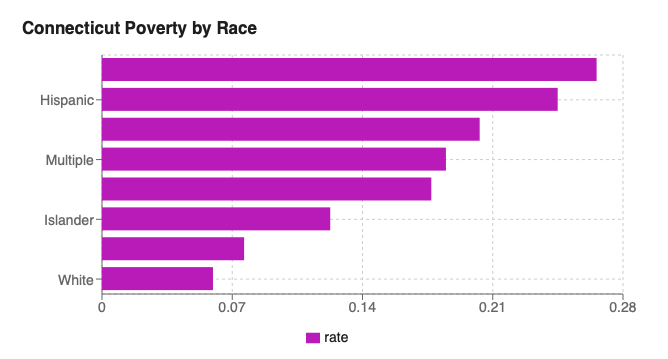


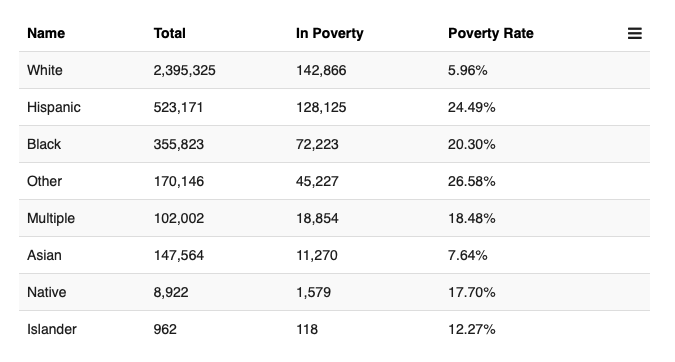


Fonte: http://worldpopulationreview.com/states/connecticut-population/

### Etnie in Base al Reddito
?? Commenti

In [13]:
race = df.dropna(subset=['Race'])["Race"]
race = np.array(race)

r = np.full(race.shape, "", dtype="object")

whiteNr = 0
hispNr = 0
blackNr = 0
otherNr = 0

for i in range(len(race)):
    if race[i] == "White":
        r[i] = "White"
        whiteNr+=1
    elif race[i] == "Black":
        r[i] = "Black"
        blackNr+=1
    elif race[i].startswith("Hispanic"):
        r[i] = "Hispanic"
        hispNr+=1
    else:
        r[i] = "Other"
        otherNr+=1
        
whitePerc = whiteNr/2395325 * 100
hispPerc = hispNr/523171 * 100
blackPerc = blackNr/355823 * 100
otherPerc = otherNr/170146 * 100

percs = [whitePerc, blackPerc, hispPerc, otherPerc]
races = ["White", "Black", "Hispanic", "Other"]

trace0 = go.Bar(
    y = percs,
    x = races
)

data = [trace0]
layout = go.Layout(
    title='Percentuale di morti in base alla razza',
    xaxis=dict(title="Razza"),
    yaxis=dict(title="Percentuale di morti (%)")
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

### Etnia con più Morti

Si può constatare che le razze più ricche sono anche quelle che hanno il maggior numero di morti per droga. Dato interessante che è stato ottenuto suddividendo il numero di persone che appartengono ad una data razza nel nostro dataset, con il numero totale di persone di una razza che abitano in Connecticut. Siccome vi sono altre razze ma sono nettamente in minoranza, sono state inserite nella variabile 'Other'. 

### Conclusione

In conclusione possiamo dire che abbiamo trovato una correlazione tra le morti ed il reddito delle persone, questo ci porta a pensare che più una persona ha soldi più ha probabilità di morire.

Inolte abbiamo notato che la guerra alle droghe stà fallendo siccome c'è un grande aumento del numero di morti negli ultimi anni con una tendenza all'abuso di farmaci mediciali.

Infine il nostro dataset non è stato molto facile da analizzare siccome molte informazioni non erano reperibili (NaN).